# Part I - The Interplay between Loan Status and Associated Factors

## by Samuel Abiodun Alara


## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>   
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
> This data set contains information on Loan Data from Prosper. It provides detailed information for 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Some duplicates were discovered and removed.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe, print statistics
df1 = pd.read_csv('prosperLoanData.csv')

In [3]:
# Make a copy of the original dataset
data_backup = df1.copy()

In [4]:
#Explore the data structure
df1.shape

(113937, 81)

In [5]:
#Explore the data structure
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


### What is/are the main feature(s) of interest in your dataset?

> After looking at every variable individually in univariate analysis, we will explore them again with respect to the target variable.  we will find the relation between the target variable and independent variables. For instance, the study intends to investigate the factors affect a loan’s outcome status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i expect that independent variables will have effect on the target variables.

## PROGRAMMATIC ASSESSMENT

### Check for duplicates

#### Code

In [6]:
#function to check for duplicates in columns dataframe

def check_duplicates(df, cols):
    for col in cols:
        print(col)
        print(sum(df[col].duplicated()))
        print('\n')

In [7]:
columns = ['ListingNumber', 'ListingNumber', 'LoanNumber','LoanKey', 'LoanNumber']

check_duplicates(df1, columns)

ListingNumber
871


ListingNumber
871


LoanNumber
871


LoanKey
871


LoanNumber
871




### Issue: Duplicates in Data

#### Define:  Remove duplicates

In [8]:
### remove duplicates
df1 = df1.drop_duplicates('ListingNumber')

#### Test

In [9]:
columns = ['ListingNumber', 'ListingNumber', 'LoanNumber','LoanKey', 'LoanNumber']

check_duplicates(df1, columns)

ListingNumber
0


ListingNumber
0


LoanNumber
0


LoanKey
0


LoanNumber
0




In [10]:
sum(df1.duplicated())

0

<a id='uni'></a>
## Univariate Exploration

> In this section, the project investigate distributions of individual variables. Attention was given to unusual points or outliers, a deeper look to clean things up and prepare the project to look at relationships between variables.

In [11]:
#Set global font scale
sns.set(font_scale=1.5)

### Question 1: What is the distribution of LoanStatus among applicants

### Visualization:

In [12]:
### Normalize can be set to True to print proportions instead of number
#df1.LoanStatus.value_counts() #(normalize=True)

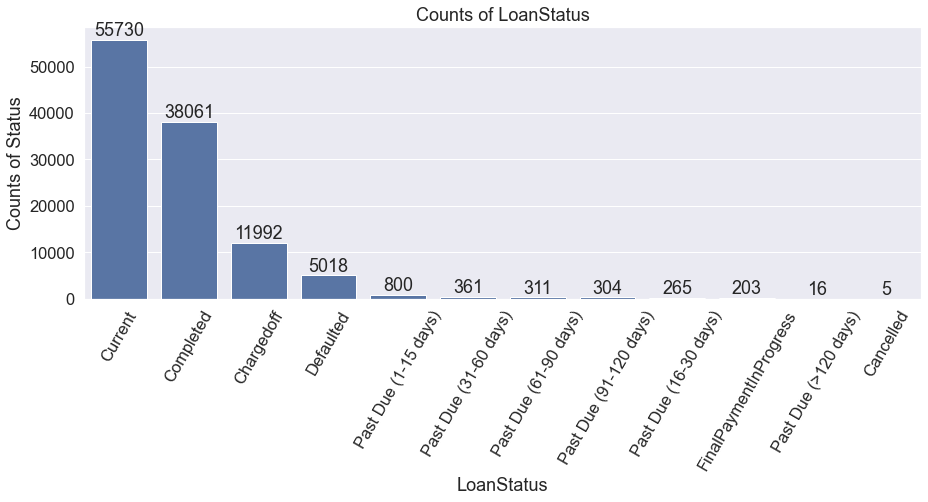

In [13]:
#univariate chart
theorder=df1['LoanStatus'].value_counts().index
plt.figure(figsize=(15,5))
myplt = sns.countplot(data=df1, x='LoanStatus', order=theorder, color=sns.color_palette()[0])
plt.xticks(rotation=60)
plt.xlabel('LoanStatus')
plt.ylabel('Counts of Status')
plt.title('Counts of LoanStatus')
myplt.bar_label(myplt.containers[0]);

### Observations:

**The loan of 55,730 (around 49%) people out of 113,066 were in current status,  while 38,061 (around 34%) were completed. Only 5,018 (around 4%) of the people defaulted while 11,992 (around 11%) of the people were Chargedoff. The rest 2% had their loan distributedd in either past due or in FinalPaymentInProgress or cancelled status. The top 3 Loan status among the people are Current, Completed, Chargedoff.

### Question 2: What is the distribution of the length of the loan expressed in months among the people

In [14]:
#df1.Term.value_counts()

In [15]:
#df1.Term.value_counts(normalize=True)

### Visualization:

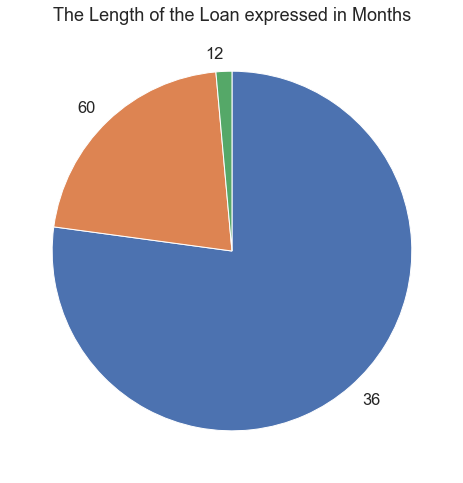

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
term=df1.Term.value_counts()
plt.pie (term, labels=term.index, startangle=90, counterclock=False)
plt.title('The Length of the Loan expressed in Months');

### Observations:

**87,224 of the people (around 77%) had thier loan terms of 36 months while 24,228 (around 21%) of the people had thier loan terms of 60 months. Moreso, less than 1% had thier loan terms of 12 months among the people. This shows majority of the people had thier loan terms of 36 months. 

### Question 3: What is the proportion distribution of the loans 'completed' and 'defaulted' among the people

### Visualization:

In [17]:
#df1[(df1['LoanStatus'] == 'Completed') | (df1['LoanStatus'] == 'Defaulted')]['LoanStatus'].value_counts(normalize=True)

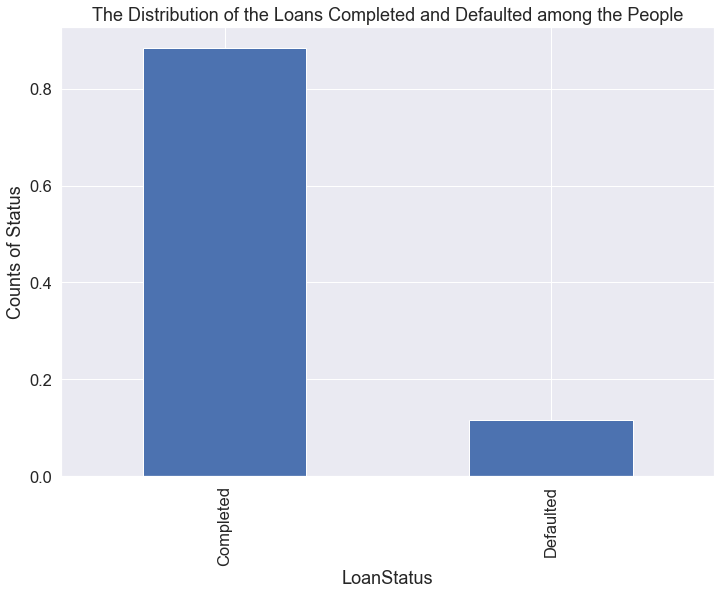

In [18]:
#getting the loans completed and defaulted
sns.set(font_scale=1.5)
(df1[(df1['LoanStatus'] == 'Completed') | (df1['LoanStatus'] == 'Defaulted')]['LoanStatus'].value_counts(normalize=True).plot(kind='bar'))
plt.title('The Distribution of the Loans Completed and Defaulted among the People')
plt.xlabel('LoanStatus')
plt.ylabel('Counts of Status');

### Observations:

**The visualization shows that about 88% of the people had thier loan completed in comparison with 12% of the people who defaulted.

### Question 4: What is the distribution of the Monthly Loan Payment among the People

### Question 5: What is the distribution of the Total Prosper Payments Billed among the People

### Question 6: What is the distribution of the Loan Original Amount among the People

### Question 7: What is the distribution of the Borrower Rate among the People

### Visualization:

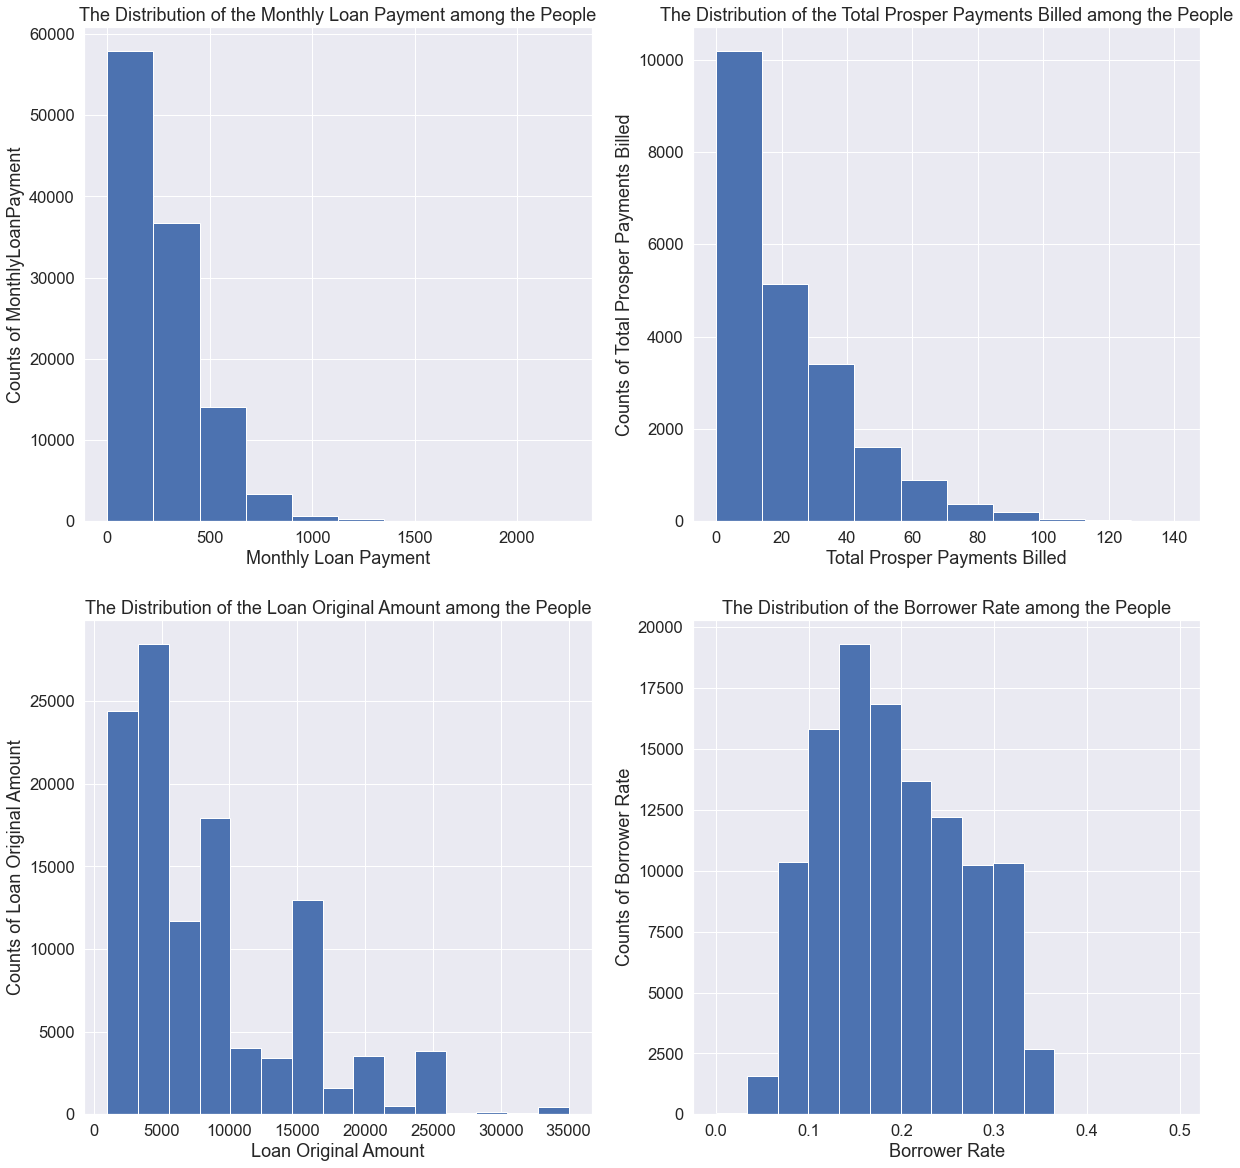

In [19]:
plt.figure(figsize=[20, 20])

plt.subplot(2,2,1)
plt.hist(data=df1, x='MonthlyLoanPayment')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Counts of MonthlyLoanPayment')
plt.title('The Distribution of the Monthly Loan Payment among the People');


plt.subplot(2,2,2)
plt.hist(data=df1, x='TotalProsperPaymentsBilled')
plt.xlabel('Total Prosper Payments Billed')
plt.ylabel('Counts of Total Prosper Payments Billed')
plt.title('The Distribution of the Total Prosper Payments Billed among the People');


plt.subplot(2,2,3)
plt.hist(data=df1, x='LoanOriginalAmount', bins=15)
plt.xlabel('Loan Original Amount')
plt.ylabel('Counts of Loan Original Amount')
plt.title('The Distribution of the Loan Original Amount among the People');


plt.subplot(2,2,4)
plt.hist(data=df1, x='BorrowerRate', bins=15)
plt.xlabel('Borrower Rate')
plt.ylabel('Counts of Borrower Rate')
plt.title('The Distribution of the Borrower Rate among the People');

### Observations:

** It can be inferred that most of the people have Monthly Loan Payment around 250 in the above distribution.

** It can be inferred that most of the people have Total Prosper Payments Billed below 20 in the above distribution.

** It can be inferred that most of the people have Loan Original Amount in the region of 5,000 in the above distribution.

** It can be inferred that the average Borrower Rate is the region of 0.20 in the above distribution.

### Question 8: What is the distribution of the LP_Interest and Fees among the people

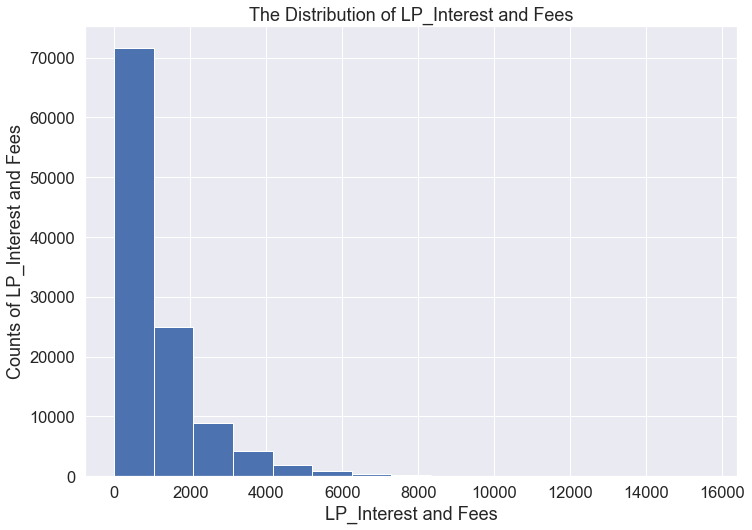

In [20]:
plt.hist(data=df1, x='LP_InterestandFees', bins=15)
plt.xlabel('LP_Interest and Fees')
plt.ylabel('Counts of LP_Interest and Fees')
plt.title('The Distribution of LP_Interest and Fees');

### Observations:

** It can be inferred that the average LP_Interest and Fees is the region of 1,000 in the above distribution.

### Question 9: What is the distribution of the the number of investors that funded the loan.

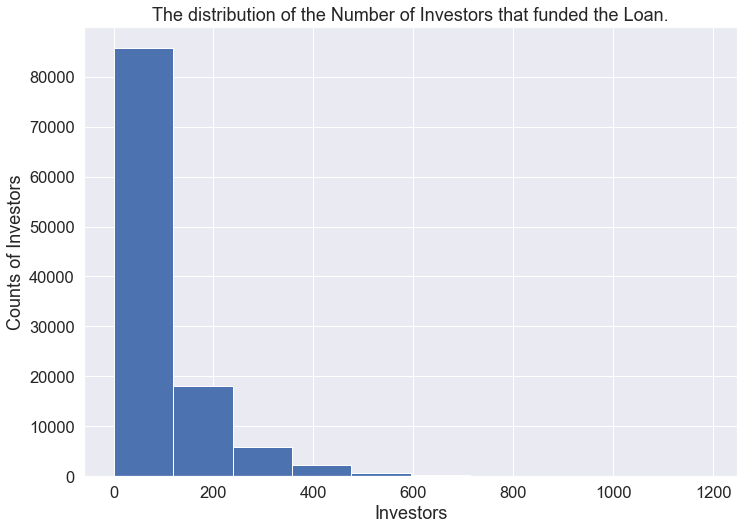

In [21]:
plt.hist(data=df1, x='Investors')
plt.xlabel('Investors')
plt.ylabel('Counts of Investors')
plt.title('The distribution of the Number of Investors that funded the Loan.');

### Observations:

** It can be inferred that the majority of the Loans are funded by a group or team of 100 investors in the above distribution.

### Question 10: What is the distribution of the Employment Status among the people

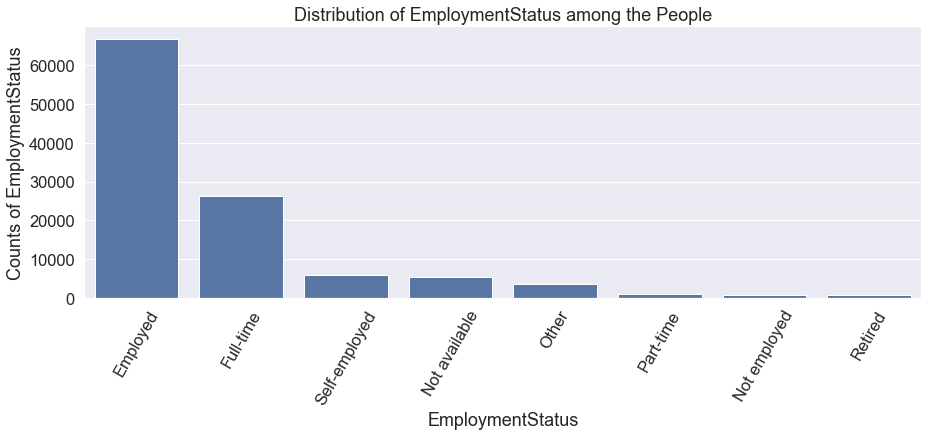

In [22]:
sns.set(font_scale=1.5)
theorder=df1['EmploymentStatus'].value_counts().index
plt.figure(figsize=(15,5))
sns.countplot(data=df1, x='EmploymentStatus', order=theorder, color=sns.color_palette()[0])
plt.xticks(rotation=60)
plt.xlabel('EmploymentStatus')
plt.ylabel('Counts of EmploymentStatus')
plt.title('Distribution of EmploymentStatus among the People');

### Observations:

**The visualization shows that most of the people are Employed in one form of occupation or the other.

### Question 11: What is the distribution of Home ownership among the people

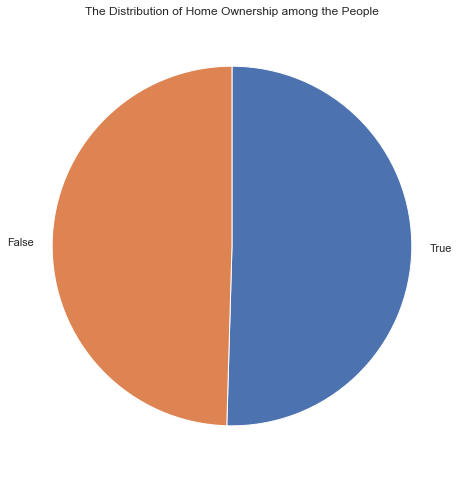

In [23]:
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(11.7,8.27)})
Ownership=df1.IsBorrowerHomeowner.value_counts()
plt.pie (Ownership, labels=Ownership.index, startangle=90, counterclock=False)
plt.title('The Distribution of Home Ownership among the People');

### Observations:

**The visualization shows that there is no substantial difference in the number of the people who owned a house and those who do not own any home.

### Question 12: What is the distribution of State among the Borrowers

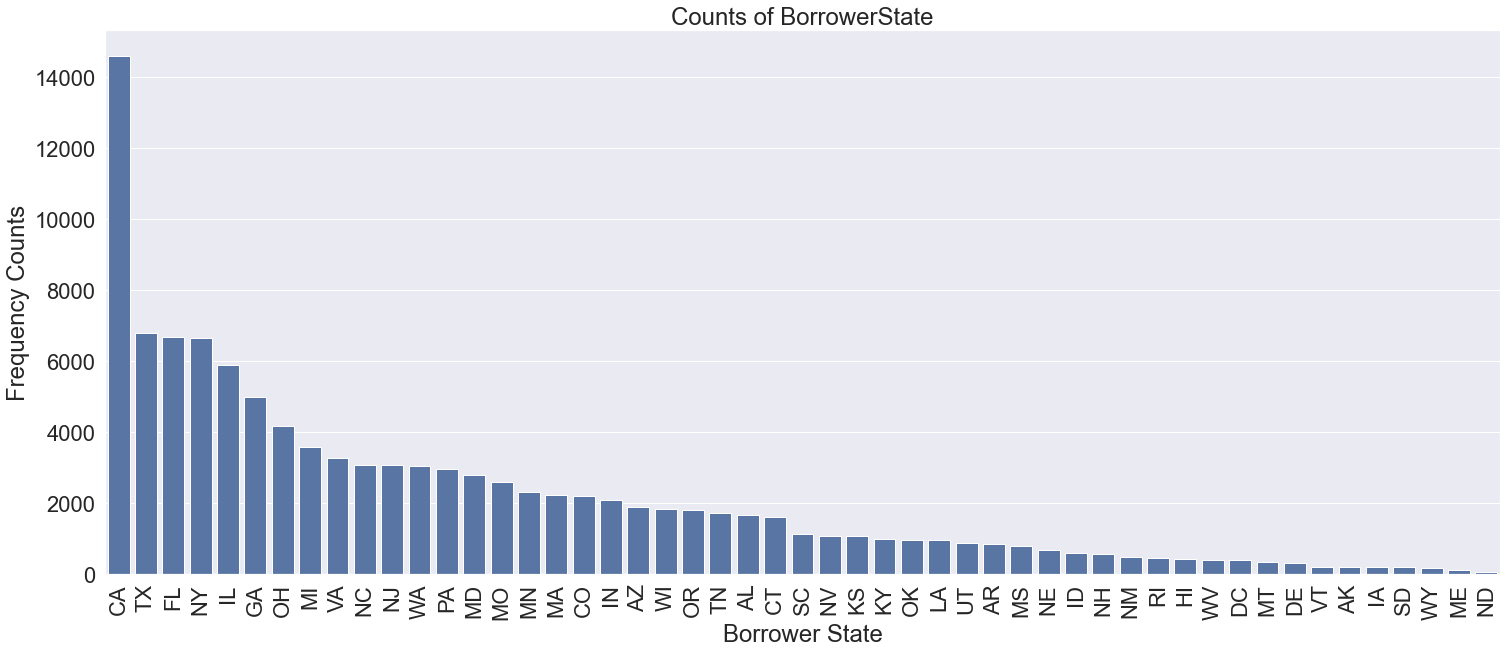

In [24]:
sns.set(font_scale=2)
theorder=df1['BorrowerState'].value_counts().index
plt.figure(figsize=(25,10))
sns.countplot(data=df1, x='BorrowerState', order=theorder, color=sns.color_palette()[0])
plt.xticks(rotation=90)
plt.xlabel('Borrower State')
plt.ylabel('Frequency Counts')
plt.title('Counts of BorrowerState');

### Observations:

**The visualization shows that most of the people hails from CA, followed by TX, FL and NY.

### Question 13: What is the distribution of Group membership among the people

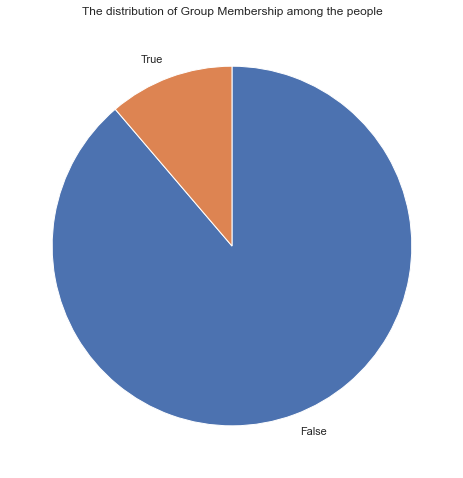

In [25]:
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(11.7,8.27)})
Membership=df1.CurrentlyInGroup.value_counts()
plt.pie (Membership, labels=Membership.index, startangle=90, counterclock=False)
plt.title('The distribution of Group Membership among the people');

### Observations:

**The visualization shows that most of the people do not belong to any group. i.e do not have group membership

### Question 14: What is the distribution of Income verifiable status among the people

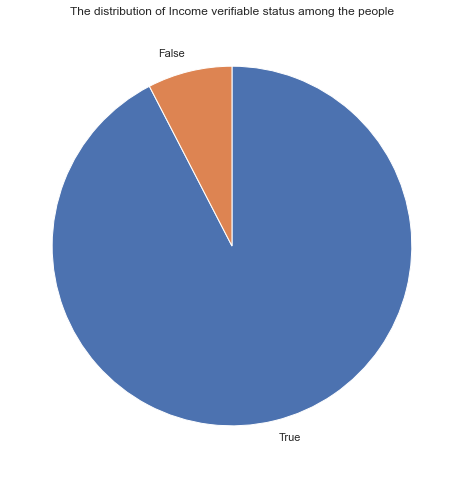

In [26]:
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(11.7,8.27)})
Income=df1.IncomeVerifiable.value_counts()
plt.pie (Income, labels=Income.index, startangle=90, counterclock=False)
plt.title('The distribution of Income verifiable status among the people');

### Observations:

**The visualization shows that majority of the people have a verifiable income status.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Our variable of interest are:

** The Loan Status and the length of the loan expressed in Months among the people!

** The Relationship between Group Membership and Home Ownership among the People

** The relationship between Group membership and Income Verifiable among the people

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The project only detected duplicates among the 'ListingNumber', 'ListingNumber', 'LoanNumber','LoanKey', 'LoanNumber' variables and they were removed!

<a id='bi'></a>
## Bivariate Exploration

> In this section, the study investigated relationships between pairs of variables in the Prosper Loan data. The variables cover here have been introduced in some fashion in the previous section (univariate exploration).

### Question 15: What is the relationship between Loan status and the length of the loan expressed in Months among the people

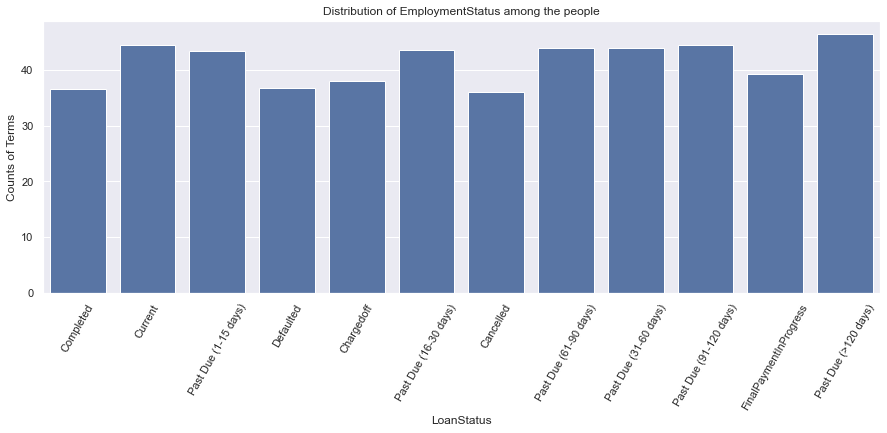

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(data=df1, x='LoanStatus', y='Term', ci=None, color=sns.color_palette()[0])
plt.xticks(rotation=60)
plt.xlabel('LoanStatus')
plt.ylabel('Counts of Terms')
plt.title('Distribution of EmploymentStatus among the people');

### Observations:

**The visualization shows that the people that completed thier loans have thier the length of the loan expressed in 36 Months and those that defaulted also have have thier the length of the loan expressed in 36 Months. This implies that the Terms do not influence whether the loan will be completed or defaulted/cancelled.

### Question 16: What is the relationship between Group membership and Home Ownership among the people

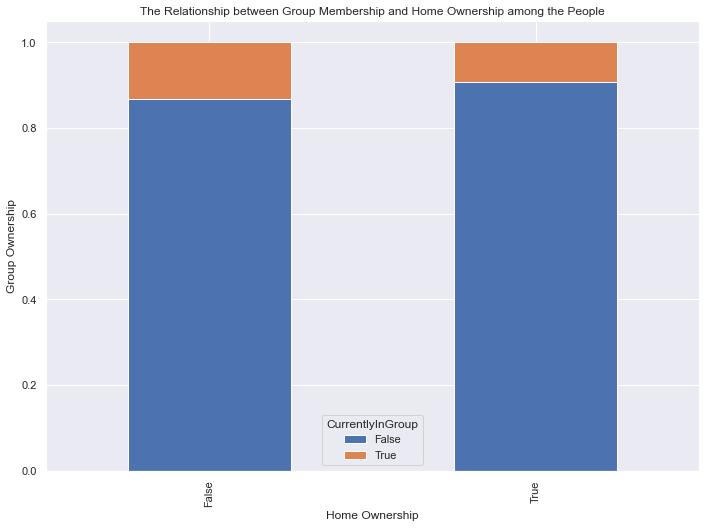

In [28]:
(pd.crosstab(df1['IsBorrowerHomeowner'],df1['CurrentlyInGroup'], 
             normalize='index')
   .plot.bar(stacked=True)
)
plt.title('The Relationship between Group Membership and Home Ownership among the People')
plt.xlabel('Home Ownership')
plt.ylabel('Group Ownership');

### Observations:

**The visualization shows that the people who do not own a home were more likely to belong to a group compared to the people who owned a home. This implies that Home ownernip influence group membership.

### Question 17: What is the relationship between Group membership and Income Verifiable among the people

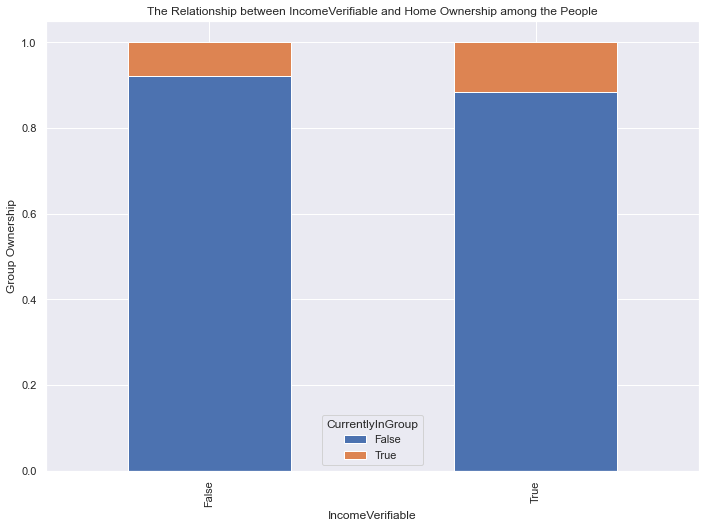

In [29]:
(pd.crosstab(df1['IncomeVerifiable'],df1['CurrentlyInGroup'], 
             normalize='index')
   .plot.bar(stacked=True)
)
plt.title('The Relationship between IncomeVerifiable and Home Ownership among the People')
plt.xlabel('IncomeVerifiable')
plt.ylabel('Group Ownership');

### Observations:

**The visualization shows that the people that have verifiable income were more likely to belong to a group compared to the people who do not have a verifiable income. This implies that verifiable income status of the people influence group membership.

### Question 18: What is the relationship between Borrowers' rate and Lenders Yield

### Visualization:

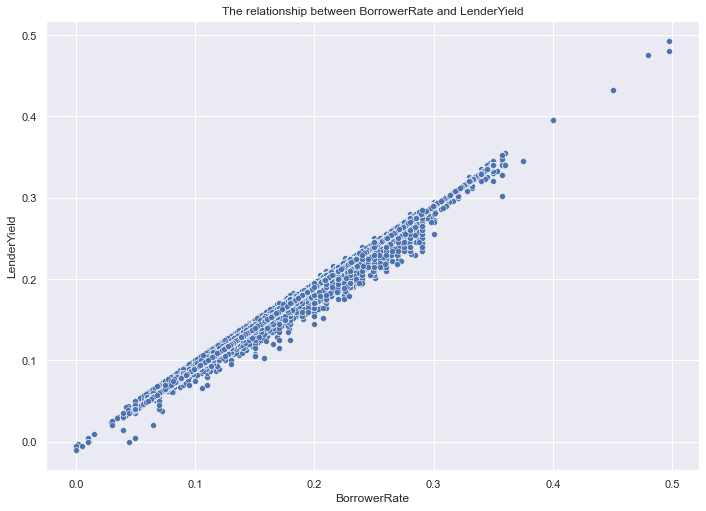

In [30]:
sns.scatterplot(data=df1, x='BorrowerRate', y='LenderYield')
plt.title('The relationship between BorrowerRate and LenderYield');

### Observations:

**The visualization shows that there is a strong and positive correlation between Borrowers' rate and Lenders Yield. This implies that one unit increase in Borrowers' rate (interest rate) will give rise to increase in Lender's yield. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


> The visualization shows that the people that completed thier loans have thier the length of the loan expressed in 36 Months and those that defaulted also have have thier the length of the loan expressed in 36 Months. This implies that the Terms do not influence whether the loan will be completed or defaulted/cancelled.

> The visualization shows that the people who do not own a home were more likely to belong to a group compared to the people who owned a home. This implies that Home ownernip influence group membership.

> The visualization shows that the people that have verifiable income were more likely to belong to a group compared to the people who do not have a verifiable income. This implies that verifiable income status of the people influence group membership


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to discover that the Terms of the Loan, do not influence whether the loan will be completed or defaulted/cancelled!

 > The visualization shows that there is a strong and positive correlation between Borrowers' rate and Lenders Yield. This implies that one unit increase in Borrowers' rate (interest rate) will give rise to increase in Lender's yield. 

<a id='multi'></a>
## Multivariate Exploration

> This section of the project create plots of three or more variables to further investigate the Prosper Loan data set. The investigations are justified, and followed from the work in the previous sections.

### Question 19: What is the relation between Loan Status, Employment Status Duration and Term among the people

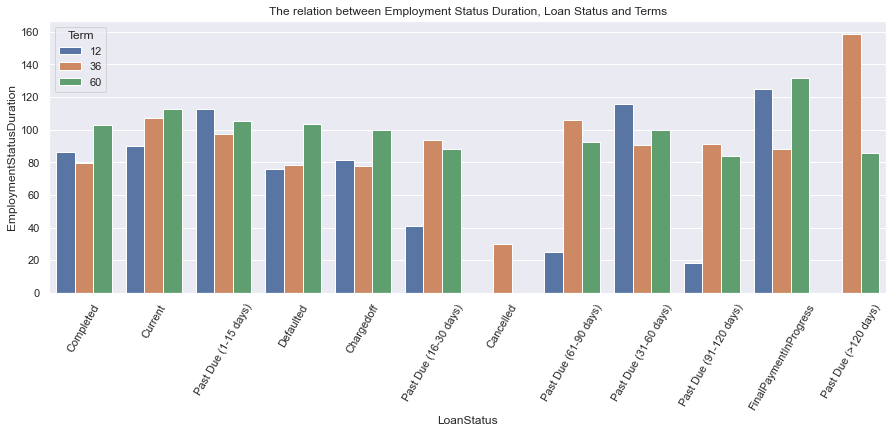

In [31]:
#Multivariate chart
plt.figure(figsize=(15,5))
sns.barplot(data=df1, x='LoanStatus', y='EmploymentStatusDuration', hue = 'Term', ci=None,)
plt.xticks(rotation=60)
plt.title('The relation between Employment Status Duration, Loan Status and Terms');

### Observations:

**The visualization shows that the data on people who have length in months of the employment status at the time the listing was created and have thier the length of the loan expressed in either 12, 36 or 60  Months do not varies a lot for the people that either completed or defaulted in their loan. This implies that the Terms do not influence whether the loan will be completed or defaulted/cancelled even when they have length in months of the employment status at the time the listing was created.

### Question 20: What is the relationship between Group membership and Home Ownership among the people

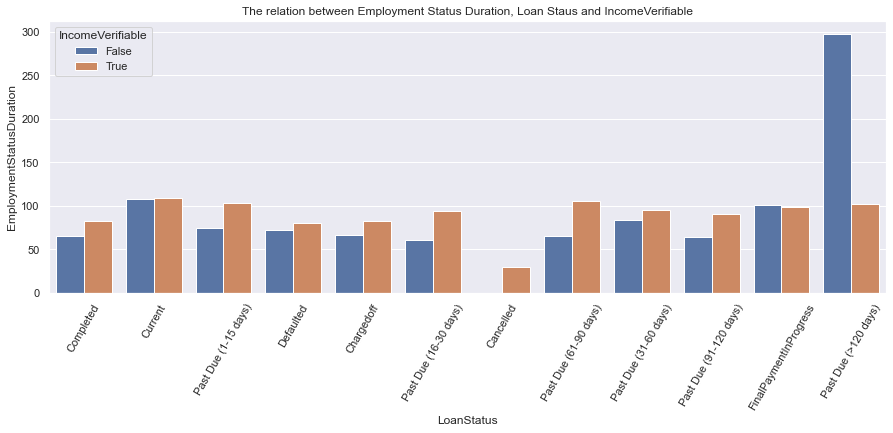

In [32]:
#Multivariate chart
plt.figure(figsize=(15,5))
sns.barplot(data=df1, x='LoanStatus', y='EmploymentStatusDuration', hue = 'IncomeVerifiable', ci=None,)
plt.xticks(rotation=60)
plt.title('The relation between Employment Status Duration, Loan Staus and IncomeVerifiable');

### Observations:

**The visualization shows that the data on people who have length in months of the employment status at the time the listing was created and have verifiable income do not varies for those that have loan status as either Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted','Chargedoff', 'Past Due (16-30 days)', 'Cancelled','Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'FinalPaymentInProgress'. However, there is a significant difference for people who have length in months of the employment status at the time the listing was created and have verifiable income or not, for those that have loan status **Past Due (>120 days).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The length of the loan expressed in either 12, 36 or 60  Months do not influence whether the loan will be completed or defaulted/cancelled even when they have length in months of the employment status at the time the listing was created.



### Were there any interesting or surprising interactions between features?

> Suprisingly, there is a significant difference for people who have length in months of the employment status at the time the listing was created and have verifiable income or not, for those that have loan status **Past Due (>120 days). This is not so for other loan status

<a id='conclusions'></a>
## Conclusions
> #### Summary of the main findings are listed below:

> The top 3 Loan status among the people are Current, Completed, Chargedoff.

> The majority of the people had thier loan terms of 36 months. 

> About 88% of the people had thier loan completed in comparison with 12% of the people who defaulted.

> It can be inferred that most of the people have Monthly Loan Payment around 250

> It can be inferred that most of the people have Total Prosper Payments Billed below 20

> It can be inferred that most of the people have Loan Original Amount in the region of 5,000

> It can be inferred that the average Borrower Rate is the region of 0.20

> It can be inferred that the average LP_Interest and Fees is the region of 1,000

> It can be inferred that the majority of the Loans are funded by a group or team of 100 investors in the above distribution.

> Findings revealed most of the people are Employed in one form of occupation or the other.

> Results shows that there is no substantial difference in the number of the people who owned a house and those who do not own any home.

> Findings revealed that most of the people hails from CA, followed by TX, FL and NY

> Most of the people do not belong to any group. i.e do not have group membership

> Majority of the people have a verifiable income status.

> The Terms of loans do not influence whether the loans will be completed or defaulted/cancelled.

> Findings revealed that the people who do not own a home were more likely to belong to a group compared to the people who owned a home. This implies that Home ownernip influence group membership.

> Results shows that the people that have verifiable income were more likely to belong to a group compared to the people who do not have a verifiable income. This implies that verifiable income status of the people influence group membership.

> There is a strong and positive correlation between Borrowers' rate and Lenders Yield. 

> The Terms of loans do not influence whether the loan will be completed or defaulted/cancelled even when they have length in months of the employment status at the time the listing was created.

> There is a significant difference for people who have length in months of the employment status at the time the listing was created and have verifiable income or not, for those that have loan status 'Past Due (>120 days)'. This is not so for other loan status.